In [ ]:
# !pip install scipy

In [ ]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации
import scipy.stats as stat

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Домашнее задание»</b></h3>


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

**Формула для определения объема выборки**

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [ ]:
sigma = np.sqrt(225)  # Стандартное отклонение
Z = 1.96  # Квантиль нормального распределения согласно таблице
Delta = 3 # Погрешность

In [ ]:
n = int(np.ceil(((sigma*Z)/Delta)**2))
n

97

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
n = 25 # Размер выборки
dof = n - 1 # Число степеней свободы 
mn = 130 # Среднее значение
sigma = 15 # Стандартное отклонение
T = 2.49  # Параметр t распределения по таблице

L =(mn - T*sigma/np.sqrt(n),mn + T*sigma/np.sqrt(n))
L

(122.53, 137.47)

In [ ]:
res = round(L[1] - L[0])
res

15

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [ ]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

k=0

for i in range(1000):
    mens  = stats.norm.rvs(loc=171, scale=10, size=1500)  # Выборка мужчин со средним ростом 171
    womens = stats.norm.rvs(loc=170, scale=10, size=1500)  # Выборка женщин со средним ростом 170
    t, p = stats.ttest_ind(mens,womens)
    if p < 0.001:
        k+=1

k

280

H0 - разлилий между выборками нет

H1 - различия между выборками есть

Если посмотреть на код выше, в цикле мы повторали эксперимент 1000 раз.

280 раза из 1000 эксеперимент показывал, что верна альтернативная гипотеза(p < уровня значимости), 

720 раз из 1000, что верна нулевая гипотеза(p > уровня значимости).

Поэтому больше склонны придерживаться нолевой гипотезе

**При большой выборке случайная вариация имеет тенденцию к усреднению, и поэтому довольно небольшой эффект может достичь статистической значимости.**

In [ ]:
mean_mens = []
mean_womens = []
for i in range(1000):
    mens  = stats.norm.rvs(loc=171, scale=10, size=1500)  # Выборка мужчин со средним ростом 171
    mean_mens.append(mens.mean())
    womens = stats.norm.rvs(loc=170, scale=10, size=1500)  # Выборка женщин со средним ростом 170
    mean_womens.append(womens.mean())

In [ ]:
means = pd.DataFrame({'mean_mens':mean_mens,
                      'mean_womens':mean_womens})

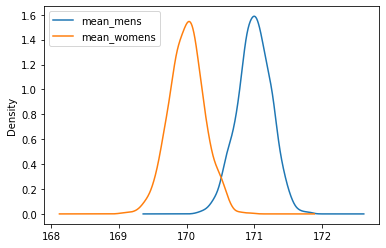

In [ ]:
means.plot(kind='density')

**Разница средних составляет 1 см. Такая разница хоть и будет являться статистически значимой не будет иметь практического смысла**

(array([  1.,   2.,   1.,  14.,  68., 111., 199., 232., 313., 240., 135.,
        114.,  41.,  23.,   6.]),
 array([130.63877944, 135.34853093, 140.05828243, 144.76803392,
        149.47778542, 154.18753692, 158.89728841, 163.60703991,
        168.3167914 , 173.0265429 , 177.73629439, 182.44604589,
        187.15579739, 191.86554888, 196.57530038, 201.28505187]),
 <a list of 15 Patch objects>)

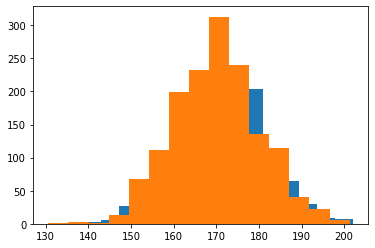

In [ ]:
plt.hist(mens, bins=15)
plt.hist(womens, bins=15)


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
sigma = 150  # Стандартное отклонение
Z = 1.96  # Квантиль нормального распределения согласно таблице
Delta = 50 # Погрешность

In [ ]:
n = int(np.ceil(((sigma*Z)/Delta)**2))
n

35

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
x = [[10,39],[15,34]]

In [ ]:

# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(x)#Возможно пригодится эта функция.

print('Статистика=%.3f, pvalue=%.3f' % (oddsratio, pvalue))
if pvalue > 0.05:
    print('Не отклоняем нулевую гипотезу, маг ,вероятно, не умеет предсказывать погоду')
else:
    print('Отклоняем нулевую гипотезу, маг ,вероятно, умеет предсказывать погоду')

Статистика=0.581, pvalue=0.354
Не отклоняем нулевую гипотезу, маг ,вероятно, не умеет предсказывать погоду


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [ ]:
def mean_confidence_interval(data, confidence=0.95): 
    n = len(data)
    m, se = np.mean(data), stat.sem(data)
    h = se * stat.t.ppf((1 + confidence)/2, n-1)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [ ]:
mean_confidence_interval(data, confidence=0.90)

(6.07363110319857, 6.628571428571429, 7.183511753944288)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

Гипотеза

H0: Выборки принадлежат одному множеству.

H1: Выборки не принадлежат одному множеству.

**Тест Манна-Уитни**

In [ ]:
mt, p = stats.mannwhitneyu(A,B)

print('Статистика=%.3f, p=%.3f' % (mt, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки принадлежат одному множеству')
else:
    print('Отклоняем нулевую гипотезу, выборки не принадлежат одному множеству')

Статистика=9280.500, p=0.000
Отклоняем нулевую гипотезу, выборки не принадлежат одному множеству


**Тест Стьюдента**

In [ ]:
t, p = stats.ttest_ind(A , B)
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки принадлежат одному множеству')
else:
    print('Отклоняем нулевую гипотезу, выборки не принадлежат одному множеству')

Статистика=11.865, p=0.000
Отклоняем нулевую гипотезу, выборки не принадлежат одному множеству


Ttest_indResult(statistic=11.865233896372924, pvalue=4.623319592204015e-25)

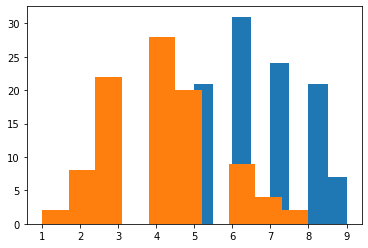

In [ ]:
plt.hist(A);
plt.hist(B);
stats.ttest_ind(A,B)

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

**Так как в данном случае p < уровня значимости(обычно 0.05) , то мы отклоняем нулевую гипотизу и считаем распределение не нормальным, при условии что мы использовали тесты предназначенные именно для проверки нормальности распределения. Можно построить график и посмотреть на распредение и так же сделать выводы о нормальности распределения.**

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

In [ ]:
stest, p = stats.ttest_ind(A , B)
print('Статистика=%.3f, p=%.3f' % (stest, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, предполагаем что различий между выборками нет или они минимальны')
else:
    print('Отклоняем нулевую гипотезу, предполагаем что различия между выборками есть')

Статистика=-1.953, p=0.051
Не отклоняем нулевую гипотезу, предполагаем что различий между выборками нет или они минимальны


**p-value не отображает различия между выборками**

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284593140469285)

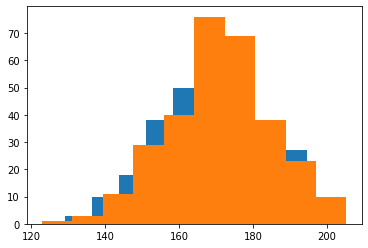

In [ ]:
plt.hist(A);
plt.hist(B);
stats.ttest_ind(A,B)